# Introduction

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

With the dataset coming from Kaggle, this report is to analyze the indicator of survival for each passenger with different backgrounds.


# Information about dataset

- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

# Questions

- __Do women have a higher chance of survival than men?__
- __What is the best age for survival?__
- __Do women with children or husbands have higher chances of survival than single women?__

# Load Data

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load
full_data = pd.read_csv('titanic-data.csv')

# Print the first few entries of the RMS Titanic data
display(full_data.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Manipulate Data

I noticed that the 'Cabin' column has a few empty data, thus I wish to further investigate that column

In [2]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


__Since 'Cabin' column only has 204 entries, I believe that it will not be representative to our analysis. Hence, I will drop that column. Moreover, since name, Fare and ticket number of a passenger won't provide any helpful information, I will also drop those two columns.__


In [3]:
data = full_data.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis = 1)

display(data.head(10))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
5,6,0,3,male,NaN,0,0,Q
6,7,0,1,male,54.0,0,0,S
7,8,0,3,male,2.0,3,1,S
8,9,1,3,female,27.0,0,2,S
9,10,1,2,female,14.0,1,0,C


__Next, I would like to fix those missing values in column 'Age'. It will be misleading to replace those NaN with any other numerical values like 0. Thus, for better accuracy, i will remove those rows with empty age.__

In [4]:
dataset = data[data["Age"].notnull()]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Embarked       712 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 50.2+ KB


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000


# Do women have a higher chance of survival than men?


In [6]:
#First let us see how many people are survived regarding their sex

info = dataset.groupby(['Sex','Survived']).size()
print info


#survival Rate

rate_male = float(info[3])/(info[3] + info[2]) * 100

rate_female = float(info[1])/(info[1] + info[0]) * 100

print

print 'Survival rates of men and woman are {}% and {}% respectively'.format(rate_male, rate_female)

Sex     Survived
female  0            64
        1           197
male    0           360
        1            93
dtype: int64

Survival rates of men and woman are 20.5298013245% and 75.4789272031% respectively


__Visualize the number of survival people between male and female__

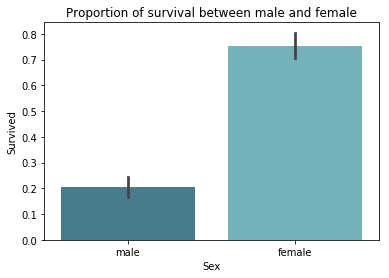

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(data=dataset,x="Sex",y="Survived", palette="GnBu_d")
plt.title('Proportion of survival between male and female')
plt.show()

## Conclusion:


__Clearly, female has a much more higher survival rate compared to that of male. Also by barplot above, it is reasonable to conclude that female has a larger chance of survival than male.__

# What is the best age for survival?


__First let's take a look of the distribution of survivors' ages__ 

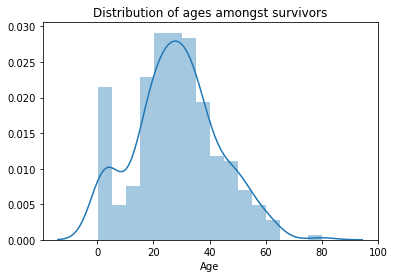

In [8]:
sur_ages = dataset[dataset["Survived"] != 0]['Age']

#we would like to see the distribution
sns.distplot(sur_ages)
plt.title('Distribution of ages amongst survivors')
plt.show()

In [69]:
#take a glance of data
sur_ages.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

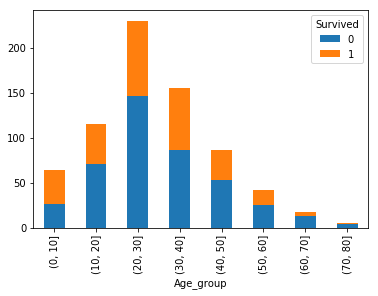

In [72]:
#create ranges(bins)
bins=np.arange(0,90,10)
#seperate data to fill in each bin
dataset['Age_group'] = pd.cut(dataset['Age'], bins)

#display the distribution with respect to whether individual survived or not
dataset.groupby(['Age_group', 'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)

Age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


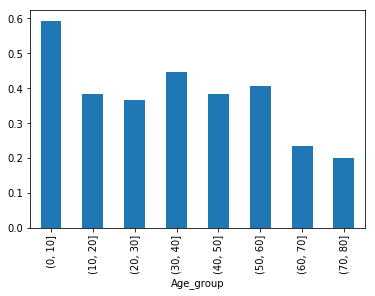

In [81]:
print dataset.groupby(['Age_group'])['Survived'].mean()
dataset.groupby(['Age_group'])['Survived'].mean().plot(kind='bar')

__Conclusion:__

__people with age from 0 to 10 have the largest survival rate and people with age from 30 to 40 and age from 50 to 60 seem have similar survival rate and rank as the second largest amonst all groups. Elder people generally have lower rate of survival.__

# Do women with husbands or children have larger survival chance?

__To investigate on this issue, first we need to create categories representing single women, women with husbands and women with children__

In [67]:
#define status of an individual 
def define_status(pd):
    if pd["SibSp"] > 0:
        if pd["Parch"] > 0:
            return "Mother"
        else:
            return "Wife"
    else:
        return "Single"

import warnings
warnings.filterwarnings('ignore')

#apply the function to create a new column to indicate the status of women
dataset["women_status"] = pd.Series(dataset.apply(define_status, axis=1), index=dataset.index)


dataset["women_status"].value_counts()


Single    471
Mother    126
Wife      117
Name: women_status, dtype: int64

__let's visualize the data as following__

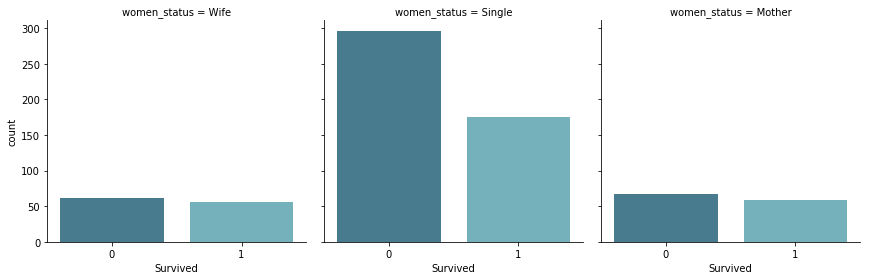

In [31]:
#plot the factorplot to visualize data
sns.factorplot(data=dataset,x="Survived", col="women_status", kind="count",palette="GnBu_d")

__let's calculate the exact percentages of survivor amongst those three categories__

In [68]:
import warnings
warnings.filterwarnings('ignore')

#calculate the number of survived mother, single women and wifes
sur_mother = len((dataset[dataset['women_status'] == 'Mother'])[dataset['Survived'] == 1])
sur_single = len((dataset[dataset['women_status'] == 'Single'])[dataset['Survived'] == 1])
sur_wife = len((dataset[dataset['women_status'] == 'Wife'])[dataset['Survived'] == 1])

#print out the percentage of survival for those three categories
print str(sur_mother/126.0 * 100)+"% of mother survived during the sink"
print str(sur_wife/117.0 * 100)+"% of wife survived during the sink"
print str(sur_single/471.0 * 100)+"% of single women survived during the sink"

46.8253968254% of mother survived during the sink
47.8632478632% of wife survived during the sink
37.1549893843% of single women survived during the sink


__Conclusion:__

__By statistical data, we find that women with either husbands or children did have higher chances of survival than single women. Moreoever, women with husbands almost have the same survival rate.__

# conclusion

__Now, we conclude that there are two big factors that influence the likelihood of survivor during the skinking of Titanic:__

- __Sex: female tends to be more likely to survive than male.__
- __Age: young children and people with middle ages(30 - 50) are more likely to survive than others.__
- __Status: Women with either children or husbands will have higher chances of survival.__


__Limitation:__

__1. since we exclude some people with empty ages, they may have some impact on our accuracy of results.__

__2. The table only includes some of the people on Titianc, but due to the limit of sample size, they may not be representative enough for us to generate a overall conclusion on the population.__

__3. Since all those factors are not completely independent, during our analysis, some other factors(we did not consider) may also influence our accuracy of the result.__

# Resources

Kaggle titanic competition page (https://www.kaggle.com/c/titanic)

Pandas documentation (http://pandas.pydata.org/pandas-docs/stable/#)

Udacity, MLND(advanced) project 0